# Capstone MDA 720 Albertsen

## Libraries

In [1]:
from pytrends.request import TrendReq
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

## Google trends

In [2]:
# Configuring connection
pytrend = TrendReq()

In [36]:
# List of keywords
kw_list = KW_list = [
    "1970 Chevrolet Camaro",
    "1970 Chevrolet Chevelle",
    "1970 Chevrolet Nova",
    "1970 Pontiac GTO",
    "1970 Oldsmobile Cutlass"
]

In [73]:
# Building payload
pytrend.build_payload(kw_list=kw_list, timeframe='today 12-m')

In [38]:
# Returning dataframe
interest_over_time_df = pytrend.interest_over_time().drop(columns='isPartial')
print("Interest Over Time:")
print(interest_over_time_df.head())

Interest Over Time:
            1970 Chevrolet Camaro  1970 Chevrolet Chevelle  \
date                                                         
2023-04-16                     42                       48   
2023-04-23                     39                       45   
2023-04-30                     59                       59   
2023-05-07                     39                       48   
2023-05-14                     43                       73   

            1970 Chevrolet Nova  1970 Pontiac GTO  1970 Oldsmobile Cutlass  
date                                                                        
2023-04-16                    0                47                       34  
2023-04-23                    0                52                       52  
2023-04-30                    0                65                       37  
2023-05-07                    0                49                       51  
2023-05-14                    0                60                       25  


## Data Prep

In [68]:
interest_over_time_df.head()

,1970 Chevrolet Camaro,1970 Chevrolet Chevelle,1970 Chevrolet Nova,1970 Pontiac GTO,1970 Oldsmobile Cutlass
date,,,,,
2023-04-16,42,48,0,47,34
2023-04-23,39,45,0,52,52
2023-04-30,59,59,0,65,37
2023-05-07,39,48,0,49,51
2023-05-14,43,73,0,60,25


In [90]:
interest_over_time_df.tail()

,1970 Chevrolet Camaro,1970 Chevrolet Chevelle,1970 Chevrolet Nova,1970 Pontiac GTO,1970 Oldsmobile Cutlass
date,,,,,
2024-03-24,51,45,0,55,35
2024-03-31,35,61,0,75,38
2024-04-07,30,44,47,42,23
2024-04-14,41,48,16,45,30
2024-04-21,38,44,9,41,27


In [104]:
interest_over_time_df.to_csv('Interestovertime_1970GM.csv', index=False)

In [69]:
print(interest_over_time_df.isnull().sum())

1970 Chevrolet Camaro      0
1970 Chevrolet Chevelle    0
1970 Chevrolet Nova        0
1970 Pontiac GTO           0
1970 Oldsmobile Cutlass    0
dtype: int64


In [70]:
interest_over_time_df.dtypes

1970 Chevrolet Camaro      int64
1970 Chevrolet Chevelle    int64
1970 Chevrolet Nova        int64
1970 Pontiac GTO           int64
1970 Oldsmobile Cutlass    int64
dtype: object

In [71]:
interest_over_time_df.head(2)

,1970 Chevrolet Camaro,1970 Chevrolet Chevelle,1970 Chevrolet Nova,1970 Pontiac GTO,1970 Oldsmobile Cutlass
date,,,,,
2023-04-16,42,48,0,47,34
2023-04-23,39,45,0,52,52


## Visulizations using Plotly

/Applications/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



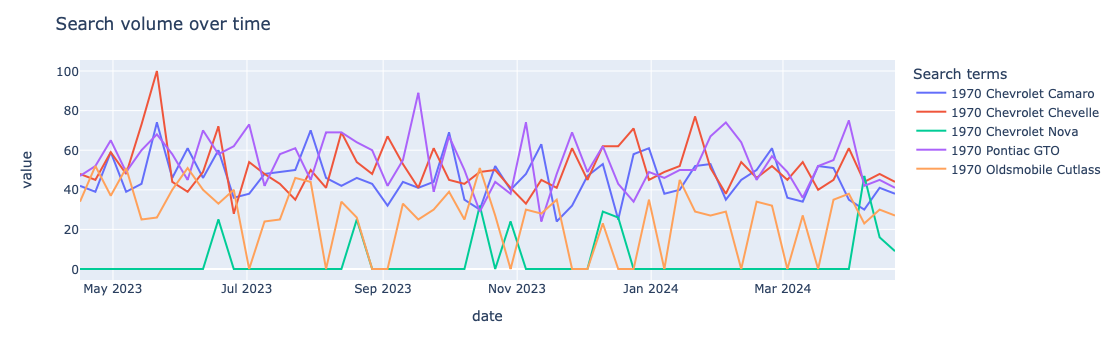

In [39]:
# Line chart
pd.options.plotting.backend = "plotly"
fig = interest_over_time_df.plot()
fig.update_layout(
    title_text='Search volume over time',
    legend_title_text='Search terms'
)
fig.show()

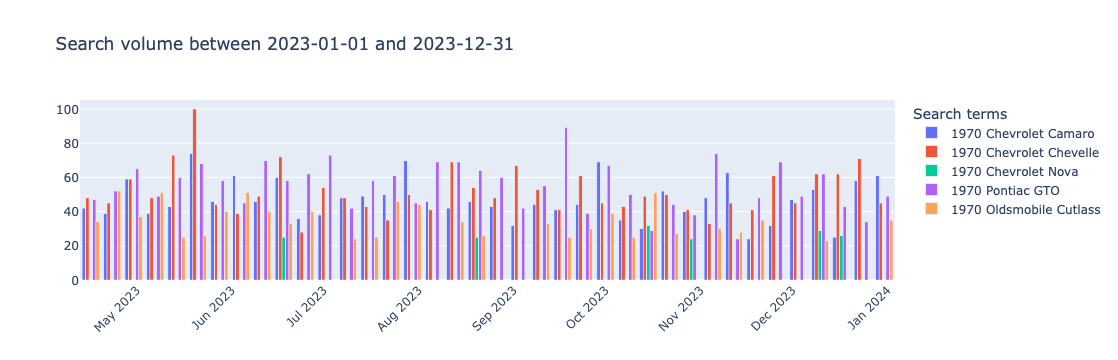

In [40]:
# Bar chart for a specific time period
start_time = '2023-01-01'
end_time = '2023-12-31'
df = interest_over_time_df.loc[(interest_over_time_df.index >= start_time) & (interest_over_time_df.index <= end_time)]
fig = go.Figure()
for kw in kw_list:
    fig.add_trace(go.Bar(
        x=df.index.astype(str),
        y=df[kw],
        name=kw
    ))
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title_text=f'Search volume between {start_time} and {end_time}',
    legend_title_text='Search terms'
)
fig.show()

In [41]:
# Interest by region
interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY')
interest_by_region_df.reset_index(inplace=True)

In [44]:
# Top countries by keyword interest
df = interest_by_region_df.sort_values('1970 Chevrolet Chevelle', ascending=False).head(10)
print("\nInterest By Region:")
print(df.head(25))


Interest By Region:
       geoName  1970 Chevrolet Camaro  1970 Chevrolet Chevelle  \
234    Ukraine                      2                       98   
103  Indonesia                     33                       67   
102      India                     34                       66   
181     Russia                     38                       62   
230    Türkiye                     41                       59   
9    Argentina                     53                       47   
141     Mexico                     27                       42   
44       Chile                     38                       35   
29      Brazil                     26                       35   
83     Germany                     39                       35   

     1970 Chevrolet Nova  1970 Pontiac GTO  1970 Oldsmobile Cutlass  
234                    0                 0                        0  
103                    0                 0                        0  
102                    0                 0

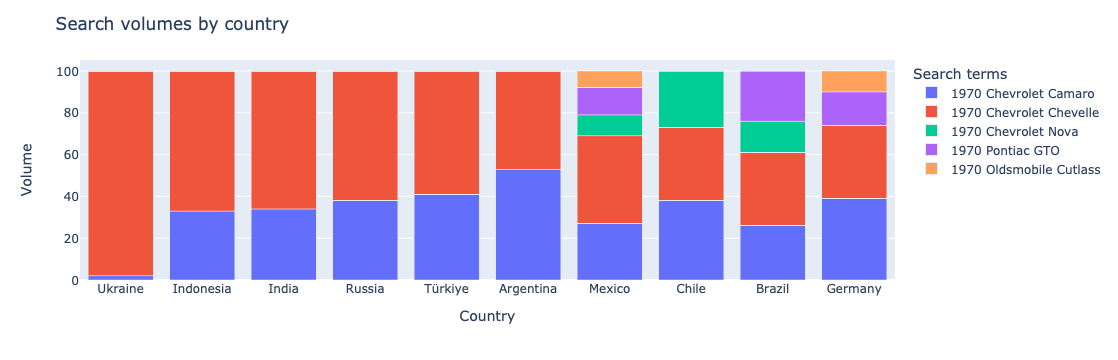

In [45]:
# Bar chart for interest by region
fig = px.bar(df, x='geoName', y=kw_list)
fig.update_layout(
    title_text='Search volumes by country',
    legend_title_text='Search terms'
)
fig.update_yaxes(title_text='Volume')
fig.update_xaxes(title_text='Country')
fig.show()

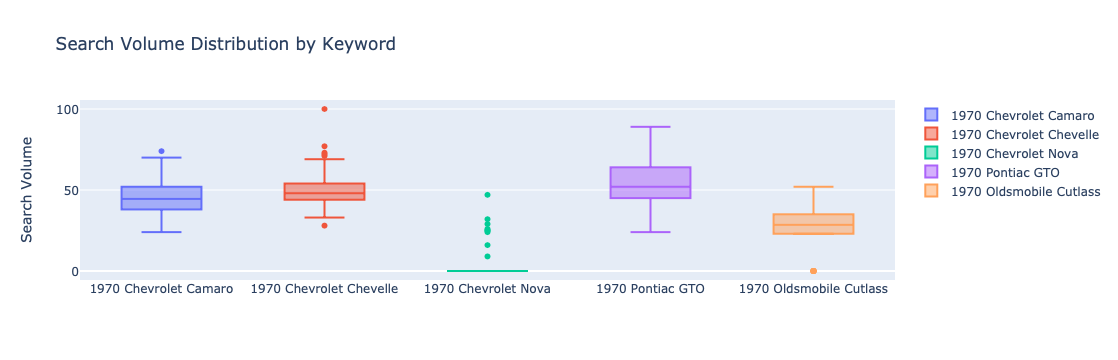

In [74]:
# Box Plot for search volume
fig = go.Figure()


kw_list = ['1970 Chevrolet Camaro', '1970 Chevrolet Chevelle', '1970 Chevrolet Nova', '1970 Pontiac GTO', '1970 Oldsmobile Cutlass']  

for kw in kw_list:
    fig.add_trace(go.Box(
        y=interest_over_time_df[kw],
        name=kw,
        boxpoints='outliers'  # This shows outliers separately
    ))

fig.update_layout(
    title_text='Search Volume Distribution by Keyword',
    yaxis_title_text='Search Volume'
)

fig.show()

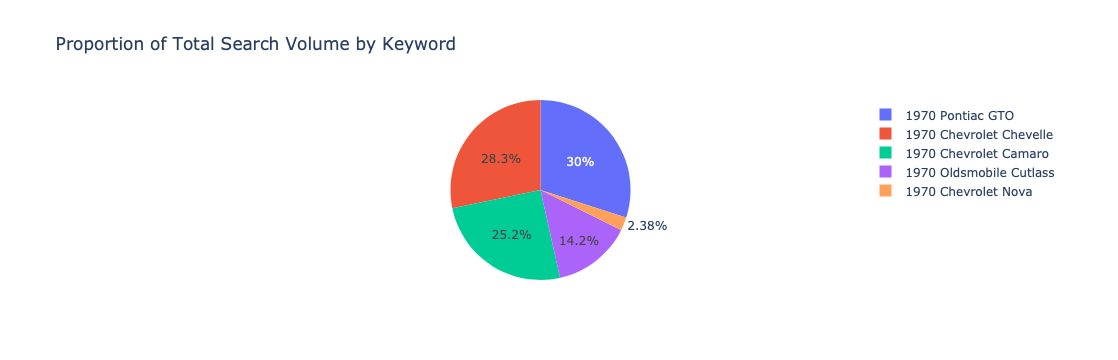

In [75]:
# pie Chart
# Summing up the search volumes for each keyword
keyword_sums = interest_over_time_df.sum().reset_index()
keyword_sums.columns = ['Keyword', 'Volume']

# Creating a pie chart
fig = px.pie(keyword_sums, values='Volume', names='Keyword', title='Proportion of Total Search Volume by Keyword')


fig.show()

## Model Building 

In [62]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

In [88]:
forecast_values.head(10)

2024-02-04    33.712500
2024-02-11    29.698326
2024-02-18    29.326240
2024-02-25    30.580868
2024-03-03    29.453758
2024-03-10    29.248783
2024-03-17    29.332517
2024-03-24    28.891908
2024-03-31    28.679893
2024-04-07    28.515092
Freq: W-SUN, Name: predicted_mean, dtype: float64

### Arima

Keyword: 1970 Chevrolet Camaro
RMSE: 12.11073410940652
MAE: 10.329085160031797
MAPE: 27.928324135595954
MSE: 146.66988066874254
Forecast values for 1970 Chevrolet Camaro:
2024-02-04    46.161501
2024-02-11    50.680073
2024-02-18    51.406206
2024-02-25    48.744252
2024-03-03    50.478815
2024-03-10    50.933616
2024-03-17    49.944697
2024-03-24    50.650124
2024-03-31    50.935851
2024-04-07    50.613632
2024-04-14    50.941411
2024-04-21    51.136991
Freq: W-SUN, Name: predicted_mean, dtype: float64


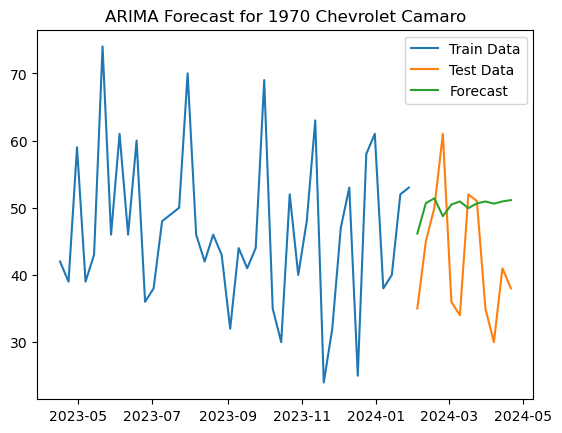

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Keyword: 1970 Chevrolet Chevelle
RMSE: 14.69764963818722
MAE: 13.435778236165746
MAPE: 30.252510689864604
MSE: 216.02090488690496
Forecast values for 1970 Chevrolet Chevelle:
2024-02-04    58.189225
2024-02-11    63.542283
2024-02-18    58.321825
2024-02-25    60.043335
2024-03-03    61.347809
2024-03-10    60.460329
2024-03-17    61.024753
2024-03-24    61.495105
2024-03-31    61.511091
2024-04-07    61.830720
2024-04-14    62.129253
2024-04-21    62.333610
Freq: W-SUN, Name: predicted_mean, dtype: float64


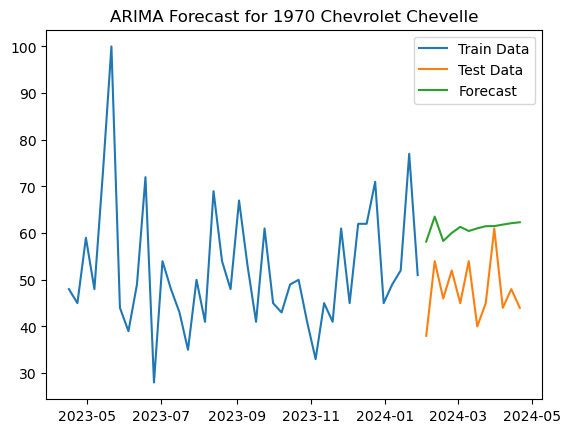

Keyword: 1970 Chevrolet Nova
RMSE: 14.56594822655549
MAE: 6.000009654016076
MAPE: inf
MSE: 212.166847738695
Forecast values for 1970 Chevrolet Nova:
2024-02-04   -0.000002
2024-02-11   -0.000003
2024-02-18   -0.000005
2024-02-25   -0.000006
2024-03-03   -0.000008
2024-03-10   -0.000009
2024-03-17   -0.000010
2024-03-24   -0.000012
2024-03-31   -0.000013
2024-04-07   -0.000014
2024-04-14   -0.000016
2024-04-21   -0.000017
Freq: W-SUN, Name: predicted_mean, dtype: float64


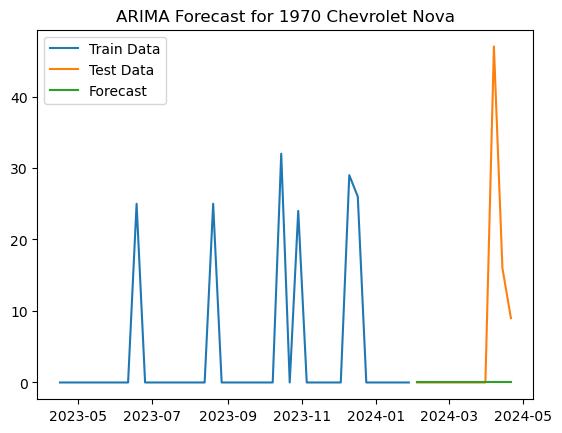

Keyword: 1970 Pontiac GTO
RMSE: 14.265563174154943
MAE: 12.571299671099254
MAPE: 25.979468804710077
MSE: 203.50629267580564
Forecast values for 1970 Pontiac GTO:
2024-02-04    53.174490
2024-02-11    56.753186
2024-02-18    60.715715
2024-02-25    55.988278
2024-03-03    58.287773
2024-03-10    58.935696
2024-03-17    57.574253
2024-03-24    58.674733
2024-03-31    58.698639
2024-04-07    58.431777
2024-04-14    58.924048
2024-04-21    58.926195
Freq: W-SUN, Name: predicted_mean, dtype: float64


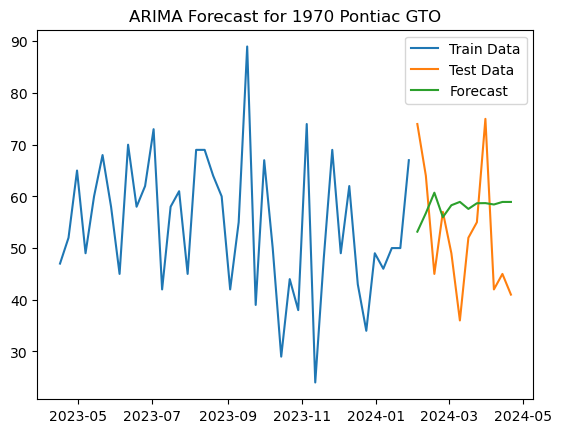

Keyword: 1970 Oldsmobile Cutlass
RMSE: 15.32905741338146
MAE: 10.438212135870643
MAPE: inf
MSE: 234.9800011827451
Forecast values for 1970 Oldsmobile Cutlass:
2024-02-04    33.712500
2024-02-11    29.698326
2024-02-18    29.326240
2024-02-25    30.580868
2024-03-03    29.453758
2024-03-10    29.248783
2024-03-17    29.332517
2024-03-24    28.891908
2024-03-31    28.679893
2024-04-07    28.515092
2024-04-14    28.235869
2024-04-21    28.012349
Freq: W-SUN, Name: predicted_mean, dtype: float64


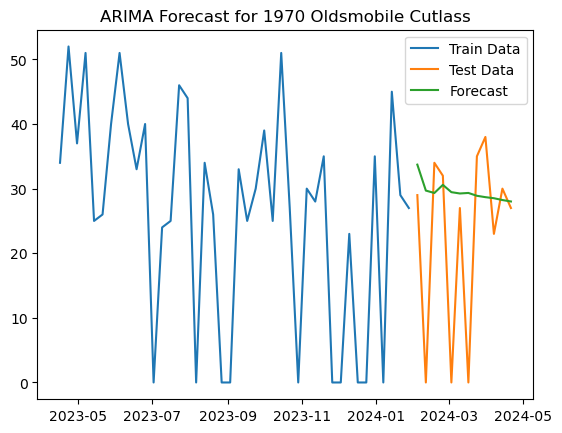

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_data = interest_over_time_df.iloc[:-12]  
test_data = interest_over_time_df.iloc[-12:] 
# Model fit each keyword
for keyword in kw_list:
    
    model = ARIMA(train_data[keyword], order=(2, 2, 1))  
    fitted_model = model.fit()

    # Forecasting
    forecast_values = fitted_model.forecast(steps=len(test_data))

    # Evaluation
    rmse = np.sqrt(mean_squared_error(test_data[keyword], forecast_values))
    mae = mean_absolute_error(test_data[keyword], forecast_values)
    mape = np.mean(np.abs((test_data[keyword] - forecast_values) / test_data[keyword])) * 100
    mse = mean_squared_error(test_data[keyword], forecast_values)
    
    print(f"Keyword: {keyword}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")
    print(f"MSE: {mse}")
    
    # Print forecast values
    print(f"Forecast values for {keyword}:")
    print(forecast_values)

    
    plt.plot(train_data.index, train_data[keyword], label='Train Data')
    plt.plot(test_data.index, test_data[keyword], label='Test Data')
    plt.plot(test_data.index, forecast_values, label='Forecast')
    plt.legend()
    plt.title(f'ARIMA Forecast for {keyword}')
    plt.show()

### Sarima

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



Keyword: 1970 Chevrolet Camaro, RMSE: 10.67126585590166
2024-02-04    53.141773
2024-02-11    37.151526
2024-02-18    34.968294
2024-02-25    47.247936
2024-03-03    46.822885
2024-03-10    30.001125
2024-03-17    54.072154
2024-03-24    51.854949
2024-03-31    40.821411
2024-04-07    42.306288
2024-04-14    46.129398
2024-04-21    52.523160
Freq: W-SUN, Name: predicted_mean, dtype: float64


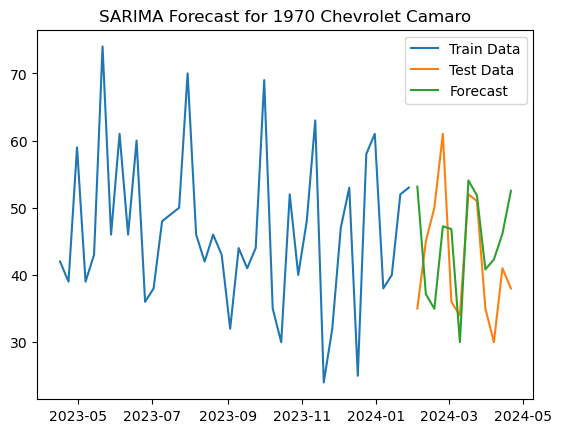

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



Keyword: 1970 Chevrolet Chevelle, RMSE: 39.804812365568296
2024-02-04     64.313968
2024-02-11     63.343853
2024-02-18     82.022139
2024-02-25     72.196874
2024-03-03     91.115666
2024-03-10     88.553441
2024-03-17    105.773725
2024-03-24     74.767337
2024-03-31     74.013264
2024-04-07     83.833021
2024-04-14    112.470622
2024-04-21     89.634290
Freq: W-SUN, Name: predicted_mean, dtype: float64


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



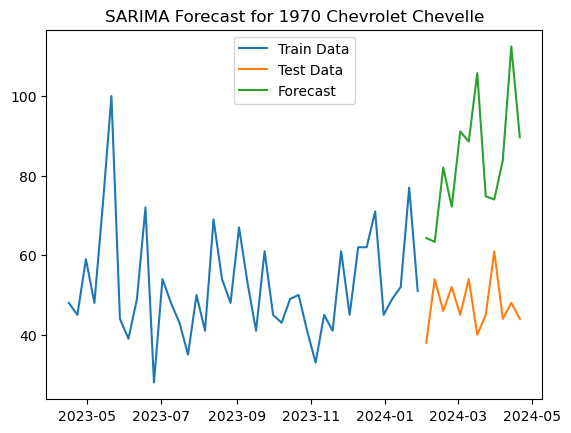

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



Keyword: 1970 Chevrolet Nova, RMSE: 16.725067213016786
2024-02-04    5.304632
2024-02-11   -3.146488
2024-02-18   -3.250483
2024-02-25    4.765976
2024-03-03    5.273523
2024-03-10    3.811004
2024-03-17   -4.211805
2024-03-24   -4.560547
2024-03-31    3.367358
2024-04-07   -5.265558
2024-04-14    0.591988
2024-04-21   -5.970259
Freq: W-SUN, Name: predicted_mean, dtype: float64


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



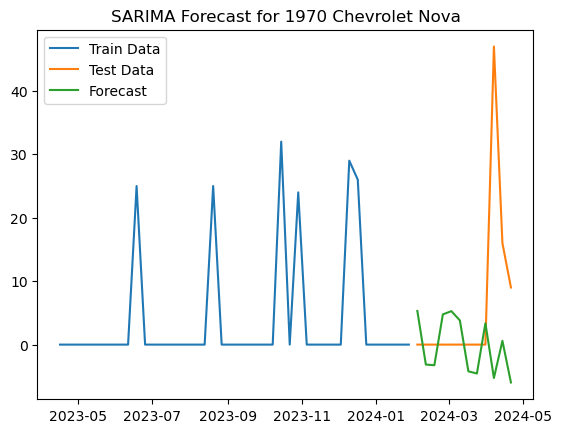

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



Keyword: 1970 Pontiac GTO, RMSE: 16.20357889176509
2024-02-04    52.021223
2024-02-11    45.286279
2024-02-18    55.560398
2024-02-25    50.902770
2024-03-03    68.062071
2024-03-10    51.361071
2024-03-17    45.358855
2024-03-24    47.906321
2024-03-31    45.648929
2024-04-07    41.183769
2024-04-14    49.863361
2024-04-21    65.272400
Freq: W-SUN, Name: predicted_mean, dtype: float64


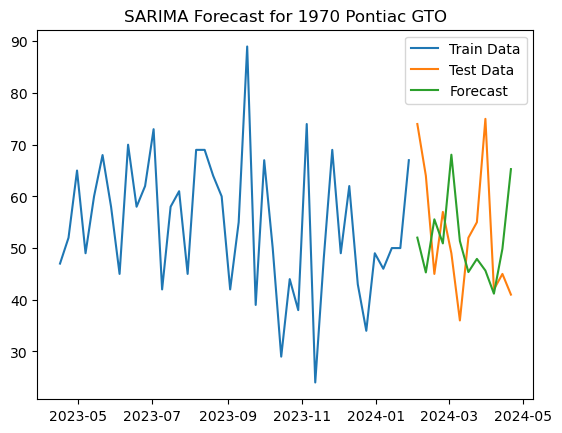

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



Keyword: 1970 Oldsmobile Cutlass, RMSE: 28.14201958750225
2024-02-04    39.803669
2024-02-11    36.612371
2024-02-18    24.926719
2024-02-25    42.979117
2024-03-03    47.223937
2024-03-10    31.591664
2024-03-17    47.156171
2024-03-24    49.818120
2024-03-31    64.954509
2024-04-07    61.846681
2024-04-14    31.397794
2024-04-21    57.192714
Freq: W-SUN, Name: predicted_mean, dtype: float64


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



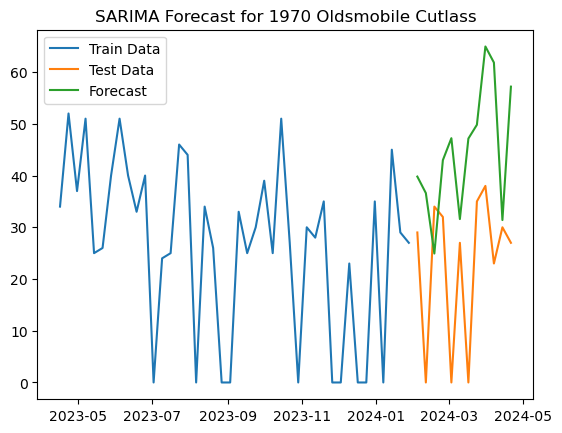

In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Assuming kw_list is your list of keywords
for keyword in kw_list:
    # Fit SARIMA model (these parameters are just an example, you should find the best ones for your data)
    model = SARIMAX(train_data[keyword], order=(2, 2, 1), seasonal_order=(1, 1, 1, 12))
    fitted_model = model.fit(disp=False)
    
    # Forecast
    forecast_values = fitted_model.forecast(steps=len(test_data))
    
    # Evaluation
    rmse = np.sqrt(np.mean((test_data[keyword] - forecast_values)**2))
    print(f"Keyword: {keyword}, RMSE: {rmse}")
    print(forecast_values)
    
    # Plotting
    plt.plot(train_data.index, train_data[keyword], label='Train Data')
    plt.plot(test_data.index, test_data[keyword], label='Test Data')
    plt.plot(test_data.index, forecast_values, label='Forecast')
    plt.legend()
    plt.title(f'SARIMA Forecast for {keyword}')
    plt.show()